In [1]:
#Imprting the packages that i will use 
import pandas as pd 
import numpy as np 
import requests
import re 
import json
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image

**Gathering Data**

In [2]:
#Reading the Twitter_archive_data file
Twitter_archive_data = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Reading the (image_predictions.tsv) file programmatically 
URL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(URL)

with open(file='image_predictions', mode='wb') as file:
    file.write(response.content)

Image_predictions_data = pd.read_csv('image-predictions.tsv', sep='\t')

In [4]:
#Reading tweet-json file
Tweet_json_data = pd.read_json('tweet-json.txt', orient = 'records', lines =True)

**Assessing Data**

**Visual assessment :**

In [5]:
Twitter_archive_data 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
Image_predictions_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


## Code for twitter API ##

Note: I was unable to use Twitter's API approach. As a result, for this project, I will use the 'tweet json.txt' file given by Udacity.

In [ ]:
#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
  #  for tweet_id in tweet_ids:
  #      count += 1
   #     print(str(count) + ": " + str(tweet_id))
    #    try:
      #      tweet = api.get_status(tweet_id, tweet_mode='extended')
         #   print("Success")
          #  json.dump(tweet._json, outfile)
          #  outfile.write('\n')
      #  except tweepy.TweepError as e:
      #      print("Fail")
      #      fails_dict[tweet_id] = e
          #  pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [7]:
Tweet_json_data

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


**Programmatic assessment :**

#### Twitter_archive_data

In [8]:
Twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
Twitter_archive_data['tweet_id'].nunique()

2356

In [10]:
Twitter_archive_data.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
Twitter_archive_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [12]:
Twitter_archive_data.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [13]:
Twitter_archive_data.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
160,860924035999428608,NaN,NaN,2017-05-06 18:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @tallylott: h*ckin adorable promposal. 13/1...,8.609145e+17,363890752.0,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,13,10,None,None,None,None,None
2285,667188689915760640,NaN,NaN,2015-11-19 03:52:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Quite an advanced dog here. Impressively dress...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667188689...,10,10,None,None,None,None,None
1302,707610948723478529,NaN,NaN,2016-03-09 16:56:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harper. She scraped her elbow attempti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707610948...,12,10,Harper,None,None,None,None
1250,711008018775851008,NaN,NaN,2016-03-19 01:54:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chuckles. He had a balloon but he acci...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711008018...,11,10,Chuckles,None,None,pupper,None
1271,709409458133323776,NaN,NaN,2016-03-14 16:02:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Billy. He sensed a squirrel. 8/10 damn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709409458...,8,10,Billy,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
1132,728760639972315136,NaN,NaN,2016-05-07 01:37:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...","When you're way too slow for the ""down low"" po...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/728760639...,13,10,None,None,None,None,None
238,847116187444137987,NaN,NaN,2017-03-29 16:00:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable... We. Only. Rate. Dogs. Please s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847116187...,11,10,None,None,None,None,None
1496,692530551048294401,NaN,NaN,2016-01-28 02:12:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cody. He's been to like 80 countr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692530551...,10,10,Cody,None,None,None,None
2208,668625577880875008,NaN,NaN,2015-11-23 03:02:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maks. Maks just noticed something wasn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668625577...,10,10,Maks,None,None,None,None


In [14]:
Twitter_archive_data['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

#### Tweet_json_data

In [15]:
Tweet_json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [16]:
Tweet_json_data['id'].nunique()

2354

In [17]:
Tweet_json_data.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

#### Image_predictions_data

In [18]:
Image_predictions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
Image_predictions_data.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

## Quality Issues

**Twitter_archive_data**
- There are unneeded columns
- The timestamp , the rating_numerator , tweet_id columns has incorrect datatypes 
- The rating_numerator and rating_denominator columns has invalid values 
- Incorrect names in name column 
- column expanded_urls has null values 

**Image_predictions_data**
- There are unneeded columns
- tweet_id has incorrect datatype 
- The columns p1 , p2 , p3 values some are capitalized and some are not
- The columns p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog and p3_dog dont have efficient names

**Tweet_json_data**
- id column has incorrect datatype 
- The 'id' column sholud be named tweet_id


## Tidness
- In Twitter_archive_data, the doggo, floofer, pupper and puppo columns shold be in one column called 'dog_stage'
- The dataframes should be merged in one dataframe.


**Cleaning Data**

In [20]:
Twitter_archive_data_clean = Twitter_archive_data.copy()
Image_predictions_data_clean = Image_predictions_data.copy()
Tweet_json_data_clean = Tweet_json_data.copy()

**Quality Issues**

### Twitter_archive_data

Define :
drop columns that are unrelevant to the analysis 

code : 

In [21]:
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id' , 'retweeted_status_timestamp']
Twitter_archive_data_clean = Twitter_archive_data_clean.drop(columns, axis=1)

Test : 

In [22]:
Twitter_archive_data_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

Define : for the null values in  expanded_urls column i will use fillna "Unknown"

Code : 

In [23]:
Twitter_archive_data_clean['expanded_urls'].fillna('Unknown' , inplace = True) 

Test : 

In [24]:
Twitter_archive_data_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

Define : the 'Timestamp' column has Incorrect datatype it should be date not a string so i will change it also, tweet_id as string and rating_numerator as float.

code : 

In [25]:
Twitter_archive_data_clean['timestamp'] = pd.to_datetime(Twitter_archive_data_clean['timestamp'])

In [26]:
Twitter_archive_data_clean['rating_numerator'] = Twitter_archive_data_clean['rating_numerator'].astype(float)

In [27]:
Twitter_archive_data_clean['tweet_id'] = Twitter_archive_data_clean['tweet_id'].astype(str)

test : 

In [28]:
Twitter_archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2356 non-null   object             
 5   rating_numerator    2356 non-null   float64            
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

Define : The values of the  rating_denominator should be 10 because I’m assuming the rating out of 10  so I replaced all the values of the rating_denominator to 10 

Code : 

In [29]:
Twitter_archive_data_clean.loc[:, 'rating_denominator'] = 10

Test : 

In [30]:
Twitter_archive_data_clean.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

Define : In the previous code I assumed that the rating will be out of 10 so rating_numerator should not be above 10 
so I will replace all the value that are greater than 10 to 10.

Code : 

In [31]:
Twitter_archive_data_clean.loc[Twitter_archive_data_clean.rating_numerator > 10 , "rating_numerator"] = 10

Test : 

In [32]:
Twitter_archive_data_clean.rating_numerator.value_counts()

10.0    1916
9.0      158
8.0      102
7.0       55
5.0       37
6.0       32
3.0       19
4.0       17
2.0        9
1.0        9
0.0        2
Name: rating_numerator, dtype: int64

Define : for the Incorrect names in name column i decided to gather the incorrect dog names in a list and replace them with 'Unknown'

Code : 

In [33]:
Incorrect_dog_names = ['None' ,'nan', 'such' ,'a' ,'not' , 'quite' , 'one' , 'an', 'all' , 'old' , 'life' , 'Dot' , 'O' , 'very' , 'his' , 'this' , 'link' , 'by' , 'hall' , 'Blanket' ,'my'] 

for name in Incorrect_dog_names:     

    Twitter_archive_data_clean['name'].replace(name, "Unknown", inplace=True)


Test : 

In [34]:
Twitter_archive_data_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'Unknown',
       'Jax', 'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart',
       'Oliver', 'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles',
       'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance',
       'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti',
       'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter',
       'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean',
       'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle',
  

### Image_predictions_data

Define : - p1 , p2 , p3 values some are capitalize and some are not so , i will make theam all capitalize 

Code : 

In [35]:
Image_predictions_data_clean['p1'] = Image_predictions_data_clean['p1'].str.capitalize()
Image_predictions_data_clean['p2'] = Image_predictions_data_clean['p2'].str.capitalize()
Image_predictions_data_clean['p3'] = Image_predictions_data_clean['p3'].str.capitalize()

Test : 

In [36]:
Image_predictions_data_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Define :  Rename the columns p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog and p3_dog to more efficient names

Code : 

In [37]:
Image_predictions_data_clean.rename(columns = {"p1": "first_prediction_algorithem",  
"p2": "second_prediction_algorithem", "p3": "third_prediction_algorithem", 
"p1_conf": "first_prediction_confidence", "p2_conf": "second_prediction_confidence", 
"p3_conf": "third_prediction_confidence", "p1_dog": "first_prediction_dog", 
"p2_dog": "second_prediction_dog", "p3_dog": "third_prediction_dog"}, inplace=True)

Test : 

In [38]:
Image_predictions_data_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'first_prediction_algorithem',
       'first_prediction_confidence', 'first_prediction_dog',
       'second_prediction_algorithem', 'second_prediction_confidence',
       'second_prediction_dog', 'third_prediction_algorithem',
       'third_prediction_confidence', 'third_prediction_dog'],
      dtype='object')

Define :  tweet_id has incorrect datatype it should be a string

Code : 

In [39]:
Image_predictions_data_clean['tweet_id'] =Image_predictions_data_clean['tweet_id'].astype(str)

Test : 

In [40]:
Image_predictions_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      2075 non-null   object 
 1   jpg_url                       2075 non-null   object 
 2   img_num                       2075 non-null   int64  
 3   first_prediction_algorithem   2075 non-null   object 
 4   first_prediction_confidence   2075 non-null   float64
 5   first_prediction_dog          2075 non-null   bool   
 6   second_prediction_algorithem  2075 non-null   object 
 7   second_prediction_confidence  2075 non-null   float64
 8   second_prediction_dog         2075 non-null   bool   
 9   third_prediction_algorithem   2075 non-null   object 
 10  third_prediction_confidence   2075 non-null   float64
 11  third_prediction_dog          2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.

### Tweet_json_data

Define : drop columns that are unrelevant to the analysis

Code : 

In [41]:
columns = ['in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 
           'in_reply_to_screen_name', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 
           'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'possibly_sensitive',
           'possibly_sensitive_appealable', 'entities', 'is_quote_status', 'extended_entities', 'is_quote_status', 
           'id_str', 'truncated', 'favorited', 'retweeted', 'display_text_range'] 

Tweet_json_data_clean = Tweet_json_data_clean.drop(columns, axis=1)

Test : 

In [42]:
Tweet_json_data_clean.columns

Index(['created_at', 'id', 'full_text', 'source', 'user', 'retweet_count',
       'favorite_count', 'lang'],
      dtype='object')

Define : Rename the 'id' column to 'tweet_id'

Code : 

In [43]:
Tweet_json_data_clean.rename(columns = {"id": "tweet_id"} , inplace=True)

Test : 

In [44]:
Tweet_json_data_clean.columns

Index(['created_at', 'tweet_id', 'full_text', 'source', 'user',
       'retweet_count', 'favorite_count', 'lang'],
      dtype='object')

Define : id column has incorrect datatype it should be a string

Code : 

In [45]:
Tweet_json_data_clean['tweet_id'] = Tweet_json_data_clean['tweet_id'].astype(str)

Test : 

In [46]:
Tweet_json_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      2354 non-null   datetime64[ns, UTC]
 1   tweet_id        2354 non-null   object             
 2   full_text       2354 non-null   object             
 3   source          2354 non-null   object             
 4   user            2354 non-null   object             
 5   retweet_count   2354 non-null   int64              
 6   favorite_count  2354 non-null   int64              
 7   lang            2354 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 147.2+ KB


**Tidiness**

Define : the doggo, floofer, pupper and puppo columns shold be in one column called 'dog_stage'

Code : 

In [47]:
Twitter_archive_data_clean["Dog_stage"] = Twitter_archive_data_clean["doggo"] + Twitter_archive_data_clean["floofer"] + Twitter_archive_data_clean["pupper"] + Twitter_archive_data_clean["puppo"]

In [48]:
columns = ['doggo', 'floofer', 'pupper', 'puppo']
Twitter_archive_data_clean = Twitter_archive_data_clean.drop(columns, axis=1)

Test : 

In [49]:
Twitter_archive_data_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10.0,10,Phineas,NoneNoneNoneNone
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10.0,10,Tilly,NoneNoneNoneNone
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10.0,10,Archie,NoneNoneNoneNone
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10.0,10,Darla,NoneNoneNoneNone
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10.0,10,Franklin,NoneNoneNoneNone


Define : The dataframes should be merged in one dataframe. 

Code : 

In [50]:
Merged_data = pd.merge(Twitter_archive_data_clean, Image_predictions_data_clean, how='inner', on=['tweet_id'])
Merged_data = pd.merge(Merged_data, Tweet_json_data_clean, how='inner', on=['tweet_id'])

Test : 

In [51]:
Merged_data.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stage,jpg_url,...,third_prediction_algorithem,third_prediction_confidence,third_prediction_dog,created_at,full_text,source_y,user,retweet_count,favorite_count,lang
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10.0,10,Phineas,NoneNoneNoneNone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,Banana,0.076110,False,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",8853,39467,en
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10.0,10,Tilly,NoneNoneNoneNone,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Papillon,0.068957,True,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",6514,33819,en
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10.0,10,Archie,NoneNoneNoneNone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,Kelpie,0.031379,True,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",4328,25461,en
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10.0,10,Darla,NoneNoneNoneNone,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,Spatula,0.040836,False,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",8964,42908,en
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10.0,10,Franklin,NoneNoneNoneNone,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,German_short-haired_pointer,0.175219,True,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",9774,41048,en


In [52]:
Merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   tweet_id                      2073 non-null   object             
 1   timestamp                     2073 non-null   datetime64[ns, UTC]
 2   source_x                      2073 non-null   object             
 3   text                          2073 non-null   object             
 4   expanded_urls                 2073 non-null   object             
 5   rating_numerator              2073 non-null   float64            
 6   rating_denominator            2073 non-null   int64              
 7   name                          2073 non-null   object             
 8   Dog_stage                     2073 non-null   object             
 9   jpg_url                       2073 non-null   object             
 10  img_num                       2073 n

In [53]:
## saving the clean dataframe as a csv file
Merged_data.to_csv('twitter_archive_master.csv')

In [54]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    2073 non-null   int64  
 1   tweet_id                      2073 non-null   int64  
 2   timestamp                     2073 non-null   object 
 3   source_x                      2073 non-null   object 
 4   text                          2073 non-null   object 
 5   expanded_urls                 2073 non-null   object 
 6   rating_numerator              2073 non-null   float64
 7   rating_denominator            2073 non-null   int64  
 8   name                          2073 non-null   object 
 9   Dog_stage                     2073 non-null   object 
 10  jpg_url                       2073 non-null   object 
 11  img_num                       2073 non-null   int64  
 12  first_prediction_algorithem   2073 non-null   object 
 13  fir

## Analyze and Visualization

In [55]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [56]:
df['years'] = df['timestamp'].dt.year

In [57]:
df.groupby('years')['retweet_count'].sum()

years
2015     717925
2016    3004222
2017    2447286
Name: retweet_count, dtype: int64

There were more retweets for tweets created in 2016, which could be because the account was more active or the data was biased.

In [58]:
df['first_prediction_confidence'].mean()

0.5945316507477092

In [59]:
df['second_prediction_confidence'].mean()

0.13466650912364342

In [60]:
df['third_prediction_confidence'].mean()

0.060340045577699446

The highest prediction confidence rats are in the third algorithms.

In [61]:
df.groupby('lang')['tweet_id'].count()

lang
en    2065
et       1
eu       1
in       2
nl       3
ro       1
Name: tweet_id, dtype: int64

The majority of tweets are written in English.

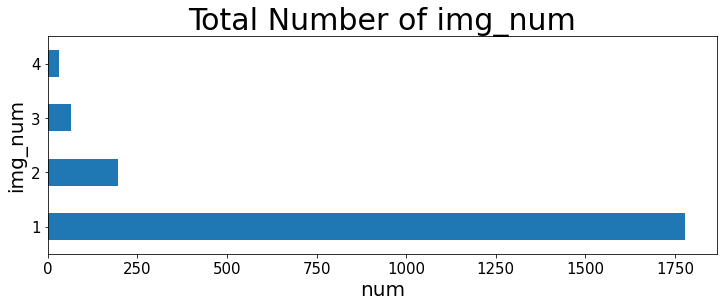

In [62]:
plt.figure(figsize=(12,4))
plt.title("Total Number of img_num", size=30)
plt.ylabel("img_num", size=20)
plt.xlabel("num", size=20)
Merged_data.img_num.value_counts().plot(kind='barh', fontsize=15);

Users are more likely to share one photo of their dogs, according to our findings.

In [63]:
df_imgnump_rts = df.groupby('img_num')['retweet_count'].sum().reset_index()
df_imgnump_rts

,img_num,retweet_count
0,1,4912027
1,2,808383
2,3,278503
3,4,170520


Text(0.5, 1.0, 'img_num and retweet_count ')

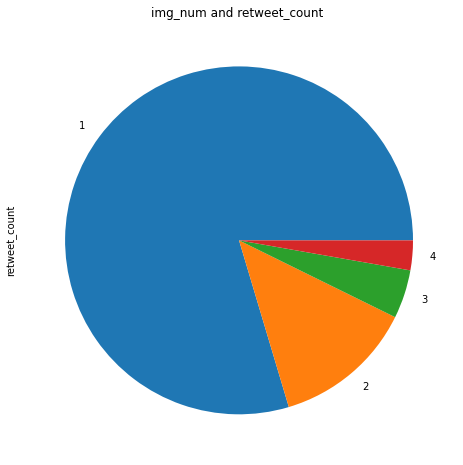

In [64]:
df['img_num'].value_counts()
plt.figure(figsize = [8, 8])

df.groupby('img_num')['retweet_count'].sum().plot(kind='pie', y='img_num')
plt.title("img_num and retweet_count ")


The number of retweets for tweets that feature one photo is the highest.